In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
FILE_PATHS = [r'cleaned_dataset\df_2020_clean.csv', r'cleaned_dataset\df_2021_clean.csv']

In [19]:
df_2020 = pd.read_csv(FILE_PATHS[0])
df_2021 = pd.read_csv(FILE_PATHS[1])

In [20]:
df_2020_companies = df_2020[df_2020['Account Type'] == 'company']
df_2020_companies.head()

,Donation ID,Account ID,Shopping Cart ID,Campaign ID,Donation Amount,Donation Date,Account Type,Full Name (F),Company Name,City,Address Line 1,State/Province,Zip Code,Campaign Name,Purpose,Fund,Tender Type,Tribute Full Name (F)
3,168,183,201,3,7.45,02/21/2020,company,unknown,amazon,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,wire transfer,unknown
4,357,183,390,3,8.38,08/13/2020,company,unknown,amazon,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,check,unknown
5,265,267,298,3,150.00,05/07/2020,company,unknown,american family insurance dreams foundation,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,check,unknown
51,156,175,188,3,250.00,02/26/2020,company,unknown,c.h. robinson,madison,4009 felland rd,wi,53718,2020 annual campaign,general operating,unrestricted,check,unknown
106,458,27,491,3,1007.00,10/05/2020,company,unknown,facebook fundraising,unknown,unknown,unknown,unknown,2020 annual campaign,general operating,unrestricted,check,unknown


In [21]:
df_2020_companies = df_2020_companies.groupby(
    'Company Name', as_index=False
).agg(
    **{
        'Donation Amount': ('Donation Amount', 'sum'),
        'Donation Count': ('Donation ID', 'count')
    }
).sort_values(by='Donation Amount', ascending=False)

df_2020_companies

,Company Name,Donation Amount,Donation Count
3,facebook fundraising,8860.00,11
16,tasc employee philanthropy committee,3500.00,1
7,longtable beer cafe,1460.00,1
13,paypal giving fund,1173.63,2
11,musgrave law office,720.00,1
15,st. martin's council of catholic women,500.00,1
12,nordic consulting partners,500.00,1
8,m3 insurance,500.00,1
5,fidelity charitable,350.00,2
9,middleton outreach ministry,250.00,1


In [22]:
df_2021_companies = df_2021[df_2021['Account Type'] == 'company']
df_2021_companies = df_2021_companies.groupby(
    'Company Name', as_index=False
).agg(
    **{
        'Donation Amount': ('Donation Amount', 'sum'),
        'Donation Count': ('Donation ID', 'count')
    }
).sort_values(by='Donation Amount', ascending=False)

df_2021_companies

,Company Name,Donation Amount,Donation Count
2,facebook fundraising,4217.32,4
3,lea culver family foundation,2500.00,1
5,the amerisourcebergen foundation,1625.00,1
4,pierce family foundation,750.00,1
1,charities aid foundation of america,150.00,1
6,yourcause,120.00,1
0,american family dreams foundation,100.00,1


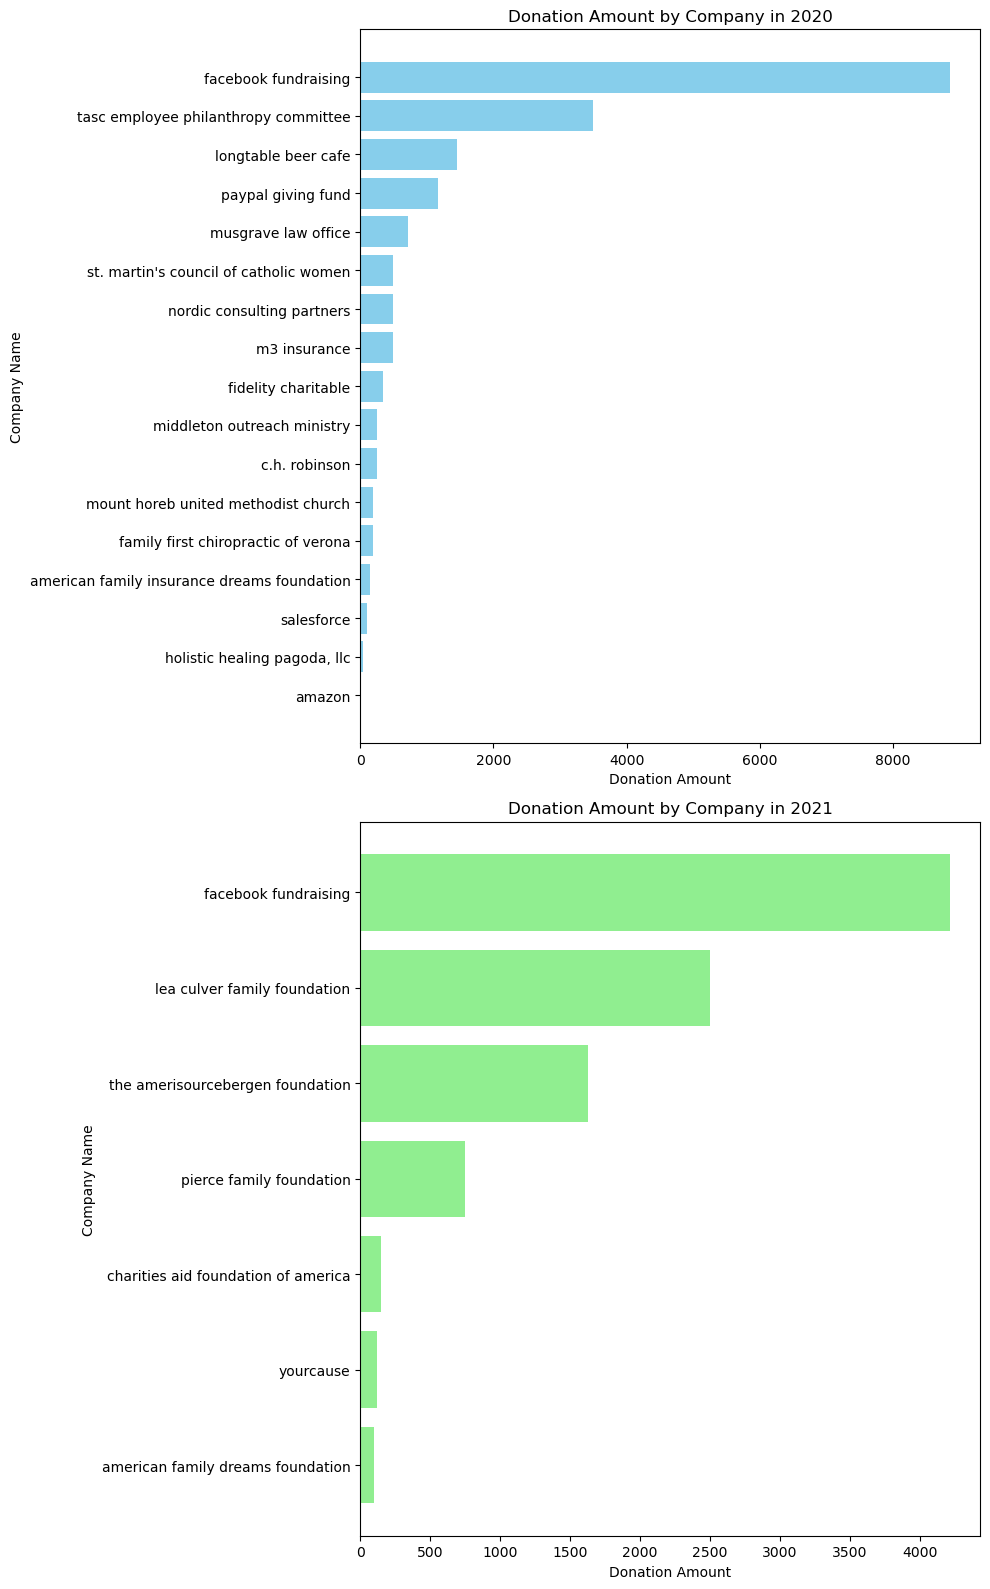

In [23]:
# Draw bar charts for companies' donations in 2020 and 2021
plt.figure(figsize=(10, 16))

# 2020 Chart
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.barh(df_2020_companies['Company Name'], df_2020_companies['Donation Amount'], color='skyblue')
plt.xlabel('Donation Amount')
plt.ylabel('Company Name')
plt.title('Donation Amount by Company in 2020')
plt.gca().invert_yaxis()  # Reverse the order so the most donation company is at the top
plt.tight_layout()

# 2021 Chart
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.barh(df_2021_companies['Company Name'], df_2021_companies['Donation Amount'], color='lightgreen')
plt.xlabel('Donation Amount')
plt.ylabel('Company Name')
plt.title('Donation Amount by Company in 2021')
plt.gca().invert_yaxis()  # Reverse the order so the most donation company is at the top
plt.tight_layout()

plt.show()